In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import pickle as pkl
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import curve_fit
import pylab
import os
from kneed import DataGenerator, KneeLocator
from prediction_model import utils

In [11]:
result_location = "/media/arjun/Shared/chaos/output_files_v2"
experiment_id = 6761016

directory = os.path.join(result_location, "rademacher_test_{}".format(experiment_id))

In [12]:
file_list = os.listdir(directory)
file_list = [ '.'.join(file.split('.')[:2]) for file in file_list if 'rademacher.pkl' in file ]
print(file_list)

['avrora-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'avrora-small-J9-d-l64-p4096-w100000i.analyzed-1', 'avrora-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'pmd-small-J9-d-l64-p4096-w100000i.analyzed-1', 'pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'sunflow-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'luindex-small-J9-d-l64-p4096-w100000i.analyzed-1', 'luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'jython-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'sunflow-small-J9-d-l64-p4096-w100000i.analyzed-1', 'sunflow-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'xalan-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'xalan-small-J9-d-l64-p4096-w100000i.analyzed-1', 'xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'jython-small-J9-d-l64-p4096-w100000i.analyzed-1', 'jython-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'lusearch-small-HotSp

Program: avrora-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.30143164447647025


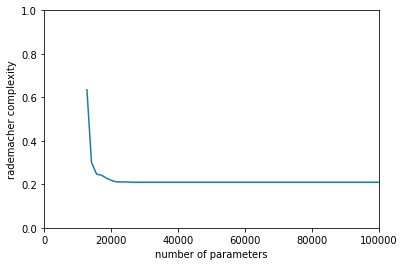

Program: avrora-small-J9-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.2631803805491098


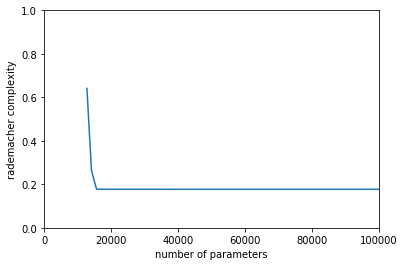

Program: avrora-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.5350250573397367


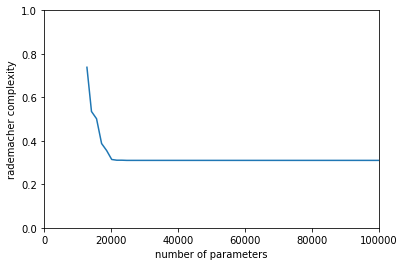

Program: pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.41657565927703855


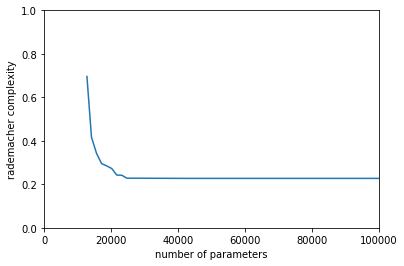

Program: pmd-small-J9-d-l64-p4096-w100000i.analyzed-1
kneepoint: 12801, kneepoint_rademacher: 0.6231500422456835


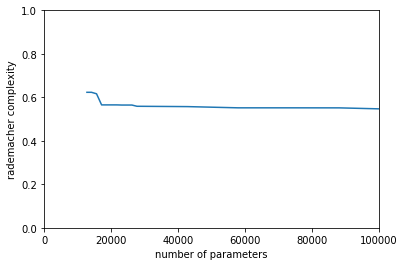

Program: pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.6150201618200669


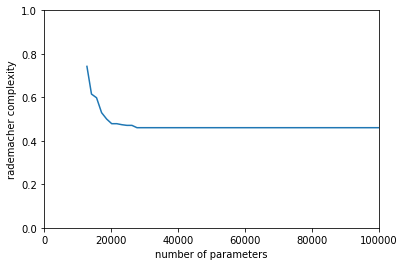

Program: sunflow-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.14343100442068343


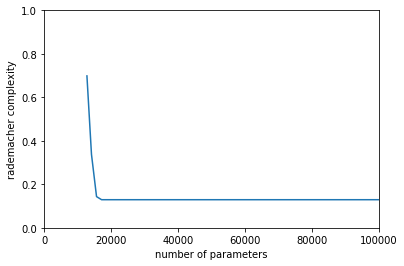

Program: luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.4269353414548573


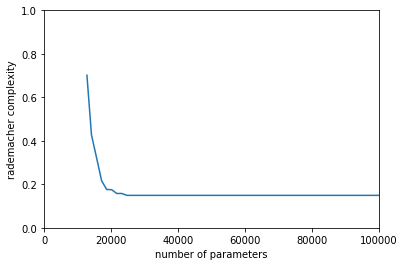

Program: luindex-small-J9-d-l64-p4096-w100000i.analyzed-1
kneepoint: 12801, kneepoint_rademacher: 0.5127029268566562


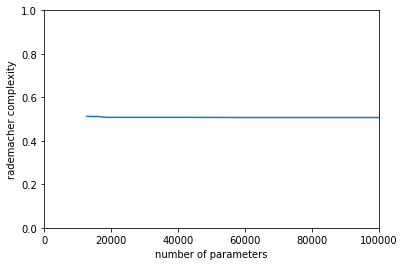

Program: luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.7430941783168755


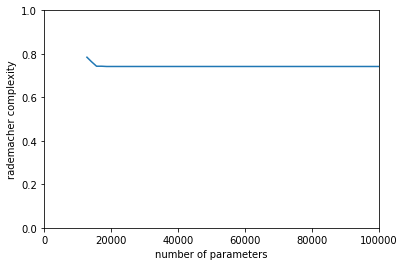

Program: jython-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.3534231385247446


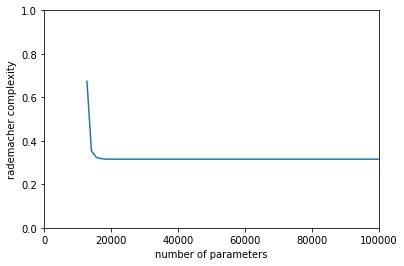

Program: sunflow-small-J9-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.2537455765459504


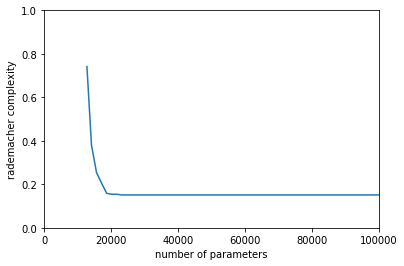

Program: sunflow-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.4926194461170354


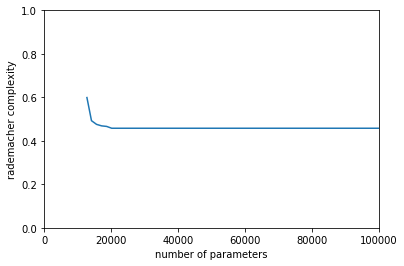

Program: xalan-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.25597873418530975


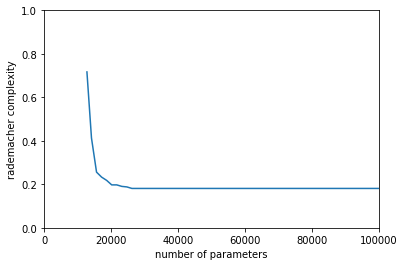

Program: xalan-small-J9-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.5690267542811432


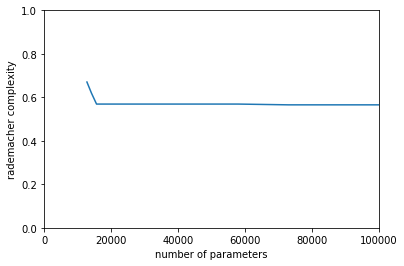

Program: xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.48713832342659913


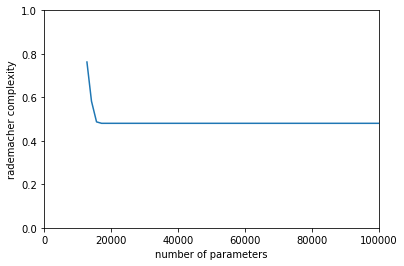

Program: jython-small-J9-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.4390590238655413


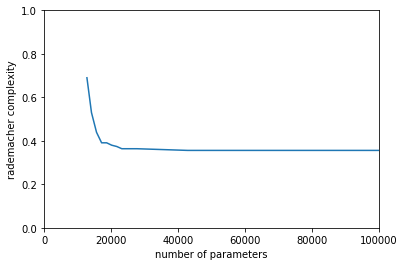

Program: jython-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.5750646591435106


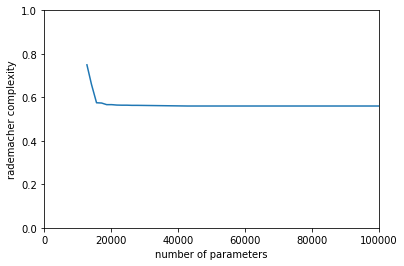

Program: lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.12483217654182821


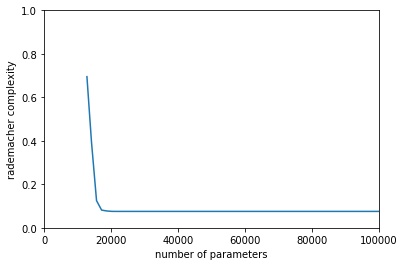

Program: lusearch-small-J9-d-l64-p4096-w100000i.analyzed-1
kneepoint: 14160, kneepoint_rademacher: 0.26445454991523104


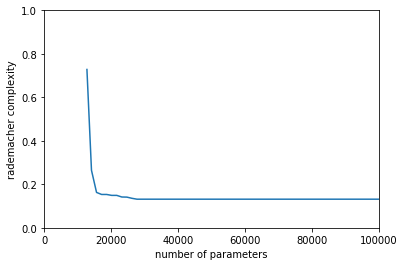

Program: lusearch-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
kneepoint: 15670, kneepoint_rademacher: 0.4916627890818821


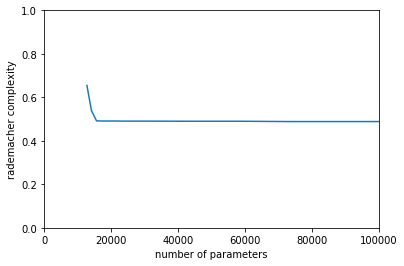

In [57]:
for program in file_list:
    print("Program: {}".format(program))
    with open(os.path.join(directory, "{}.rademacher.pkl".format(program)), 'rb') as f:
        rademacher_list = pkl.load(f)
    
    with open(os.path.join(directory, "{}.params.pkl".format(program)), 'rb') as f:
        param_list = pkl.load(f)
        
    with open(os.path.join(directory, "{}.result.pkl".format(program)), 'rb') as f:
        result = pkl.load(f)
    
    print("kneepoint: {}, kneepoint_rademacher: {}".format(result[0], result[1]))
    
    min_rad_list = [ np.min(rademacher_list[:val+1]) for val in range(len(rademacher_list)) ]
    
#     plt.ylim((0.8, 1))
    plt.xlabel("number of parameters")
    plt.ylabel("rademacher complexity")
    plt.plot(param_list, min_rad_list)
    plt.ylim((0, 1))
    plt.xlim((0, 1e5))
    plt.show()

In [19]:
rademacher_dict = {}
param_dict = {}

for program in file_list:
    with open(os.path.join(directory, "{}.result.pkl".format(program)), 'rb') as f:
        result = pkl.load(f)
    program_key = '-'.join([program.split('-')[0], program.split('-')[2]])
    rademacher_dict[program_key] = result[1]
    param_dict[program_key] = result[0]

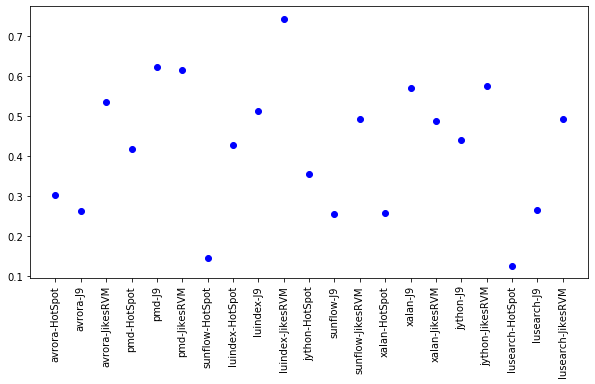

In [28]:
fig = plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(list(rademacher_dict.keys()), list(rademacher_dict.values()), 'bo')

## Program with jvm order using Rademacher val

In [43]:
programs = np.unique([ val.split('-')[0] for val in list(rademacher_dict.keys()) ])
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

for program in programs:
    vals = np.array([ rademacher_dict['-'.join([program, jvm])] for jvm in jvms ])
    
#     print(np.argsort(vals))
    print("{}, {}: {}".format(program, np.sort(vals), np.array(jvms)[np.array(np.argsort(vals))]))

avrora, [0.26318038 0.30143164 0.53502506]: ['J9' 'HotSpot' 'JikesRVM']
jython, [0.35342314 0.43905902 0.57506466]: ['HotSpot' 'J9' 'JikesRVM']
luindex, [0.42693534 0.51270293 0.74309418]: ['HotSpot' 'J9' 'JikesRVM']
lusearch, [0.12483218 0.26445455 0.49166279]: ['HotSpot' 'J9' 'JikesRVM']
pmd, [0.41657566 0.61502016 0.62315004]: ['HotSpot' 'JikesRVM' 'J9']
sunflow, [0.143431   0.25374558 0.49261945]: ['HotSpot' 'J9' 'JikesRVM']
xalan, [0.25597873 0.48713832 0.56902675]: ['HotSpot' 'JikesRVM' 'J9']


## Program with jvm using n_params

In [45]:
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

for program in programs:
    vals = np.array([ param_dict['-'.join([program, jvm])] for jvm in jvms ])
    
#     print(np.argsort(vals))
    print("{}, {}: {}".format(program, np.sort(vals), np.array(jvms)[np.array(np.argsort(vals))]))

avrora, [14160 14160 14160]: ['JikesRVM' 'J9' 'HotSpot']
jython, [14160 15670 15670]: ['HotSpot' 'JikesRVM' 'J9']
luindex, [12801 14160 15670]: ['J9' 'HotSpot' 'JikesRVM']
lusearch, [14160 15670 15670]: ['J9' 'JikesRVM' 'HotSpot']
pmd, [12801 14160 14160]: ['J9' 'JikesRVM' 'HotSpot']
sunflow, [14160 15670 15670]: ['JikesRVM' 'J9' 'HotSpot']
xalan, [15670 15670 15670]: ['JikesRVM' 'J9' 'HotSpot']


## jvm rademacher value distribution

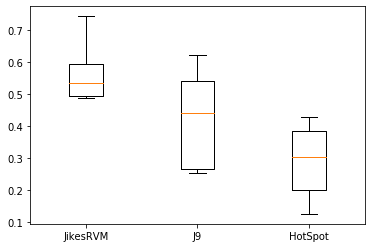

In [55]:
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

jvm_distribution = []

for jvm in jvms:
    vals = np.array([ rademacher_dict['-'.join([program, jvm])] for program in programs ])
    
    jvm_distribution.append(vals)

plt.boxplot(jvm_distribution, labels=jvms)
plt.show()

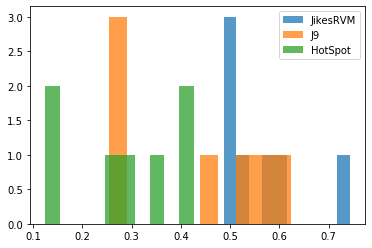

In [54]:
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

for jvm in jvms:
    vals = np.array([ rademacher_dict['-'.join([program, jvm])] for program in programs ])
    
    plt.hist(vals, alpha=0.75, label=jvm)

plt.legend()
plt.show()